In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

delays = {}

exec(open('utils.py').read())
print('Loaded')

MAX_YEAR = CURRENT_YEAR + 100 # CURRENT_YEAR defined in utils.py
years = list(range(CURRENT_YEAR, MAX_YEAR))

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.03758  | 1.173     | 1.877     | 6.549     |
| 5         | -0.0375   | 0.06304   | 3.495     | 7.536     |
| 13        | -0.02862  | 0.604     | 8.016     | 1.904     |
| 36        | -0.01376  | 0.3002    | 7.435     | 1.544     |
| 44        | -0.01257  | 0.06187   | 8.017     | 1.152     |
| 47        | -0.009503 | 0.7222    | 8.136     | 0.8222    |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.7221770188575014,
 'shift': 8.136362476844333,
 'slope': 0.8222213868225198}
-
## Chance of nonscaling delay ##


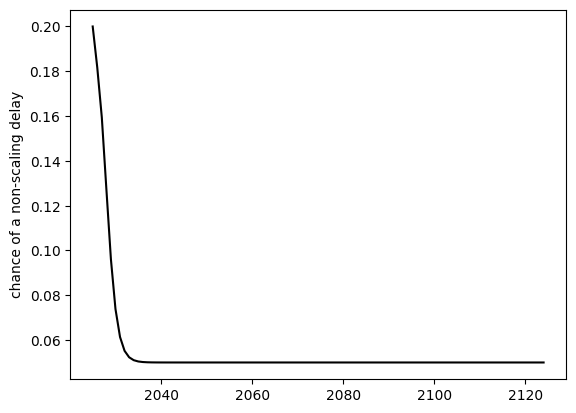

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2035 - ch

In [2]:
nonscaling_points = [(2024, 0.2),
                     (2027, 0.15),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1249   | 1.291     | 6.586     | 9.124     |
| 6         | -0.1097   | 1.023     | 3.597     | 3.637     |
| 9         | -0.09053  | 2.385     | 6.647     | 0.4329    |
| 33        | -0.05596  | 0.13      | 6.535     | 4.749     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 43        | -0.048    | 0.01      | 7.118     | 6.61      |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 88        | -0.03817  | 0.02894   | 6.272     | 5.548     |
| 97        | -0.02878  | 0.04483   | 5.848     | 5.167     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.04483259993707241,
 'shift': 5.847760437671844,
 'slope': 5.166862343814113}
-
## Chance of nonscaling delay ##


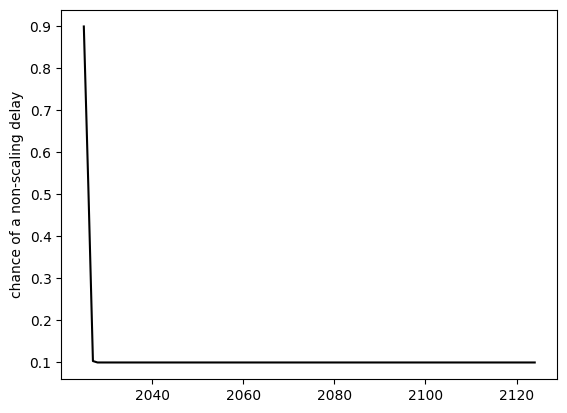

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 52%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2035

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.9),
                     (2026, 0.5),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 6         | -0.1508   | 1.873     | 2.95      | 8.769     |
| 11        | -0.1298   | 0.4399    | 8.939     | 2.456     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 52        | -0.04502  | 0.01      | 5.015     | 1.922     |
| 57        | -0.04484  | 0.01      | 4.6       | 1.897     |
| 61        | -0.04212  | 0.01825   | 5.322     | 1.357     |
| 62        | -0.0226   | 0.1936    | 6.157     | 1.267     |
| 80        | -0.01332  | 0.3396    | 8.364     | 0.955     |


<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.33957063174263225,
 'shift': 8.364269585981825,
 'slope': 0.9550407247107854}
-
## Chance of nonscaling delay ##


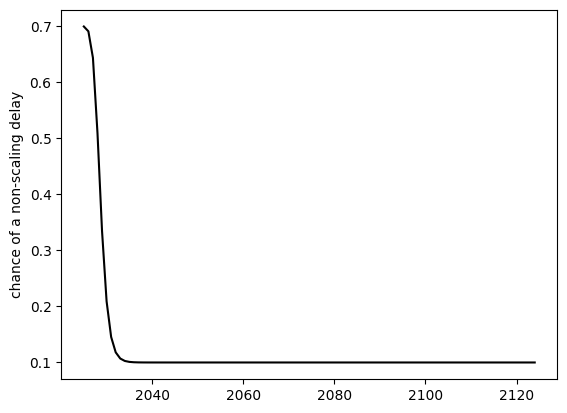

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 64%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 51%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2035

In [4]:
nonscaling_points = [(2024, 0.7),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.05167  | 2.16      | 2.467     | 6.925     |
| 7         | -0.05     | 0.23      | 8.784     | 3.042     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 46        | -0.05     | 0.01      | 5.952     | 3.322     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 55        | -0.04928  | 0.01      | 2.468     | 1.992     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 86        | -0.04604  | 0.01      | 6.492     | 1.84      |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 107       | -0.03403  | 0.07551   | 5.802     | 0.6244    |
| 111       | -0.02042  | 0.03701   | 5.957     | 1.103     |
| 118       | -0.01587  | 0.7335    | 3.675     | 0.1938    |
Curve params found
{'push': 0.7334939215175151,
 'shift': 3.675431447829529,
 'slope': 0.19376507987207944}
-
## Chance of nonscaling delay ##


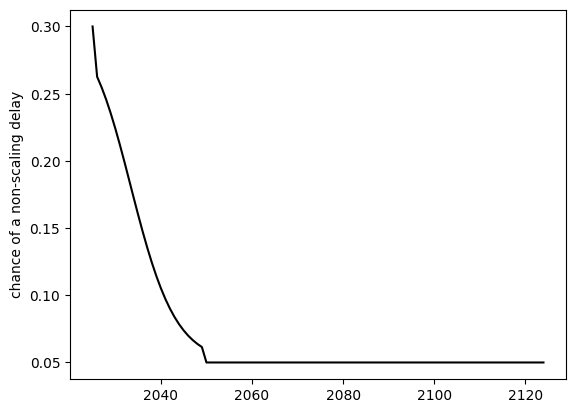

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2035

In [5]:
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(1, 5)],
                                                                        [0.15, sq.lognorm(1, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.05443  | 3.956     | 7.7       | 9.759     |
| 5         | -0.05039  | 1.147     | 4.735     | 4.655     |
| 12        | -0.05005  | 0.7695    | 8.383     | 3.644     |
| 29        | -0.05002  | 0.8491    | 0.5459    | 7.823     |
| 34        | -0.05     | 0.437     | 6.753     | 9.846     |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 43        | -0.05     | 0.01      | 3.121     | 10.0      |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 44        | -0.05     | 0.01      | 3.166     | 6.803     |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 47        | -0.05     | 0.01      | 0.01      | 4.559     |
| 59        | -0.05     | 0.01      | 2.004     | 5.054     |
| 60        | -0.04999  | 0.01      | 5.287     | 3.204     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 82        | -0.04999  | 0.01      | 7.226     | 3.056     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.01, 'shift': 7.226033626657171, 'slope': 3.0556567671998995}
-
## Chance of nonscaling delay ##


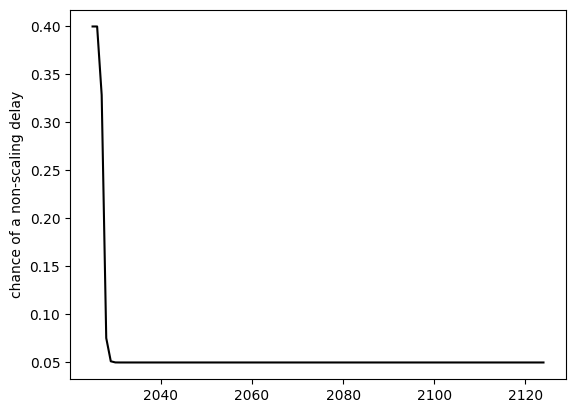

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2035 - chan

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.4),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 12        | -0.0108   | 3.102     | 2.837     | 9.847     |
| 19        | -0.01008  | 0.7921    | 6.025     | 2.766     |
| 20        | -0.009918 | 0.06459   | 8.502     | 2.133     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 61        | -0.009679 | 0.01      | 6.983     | 2.193     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.01, 'shift': 6.983367095180534, 'slope': 2.192753380372012}
-
## Chance of nonscaling delay ##


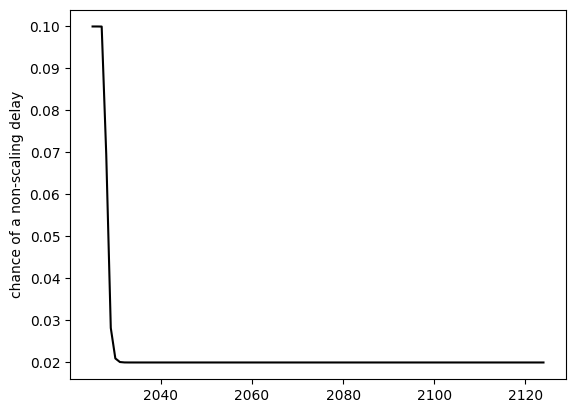

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 3%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2035 - chan

In [7]:
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.1187   | 3.237     | 1.093     | 9.609     |
| 13        | -0.1127   | 1.381     | 4.12      | 7.179     |
| 22        | -0.1125   | 0.9595    | 9.714     | 5.833     |
| 25        | -0.1125   | 0.01751   | 4.933     | 9.334     |
| 30        | -0.1125   | 0.0302    | 8.941     | 3.379     |
| 33        | -0.0696   | 0.265     | 1.193     | 0.449     |
| 42        | -0.06162  | 1.025     | 1.796     | 0.06673   |
| 58        | -0.06147  | 0.1249    | 0.9326    | 0.5242    |
| 60        | -0.0613   | 0.4002    | 1.558     | 0.341     |
| 71        | -0.04253  | 0.216     | 1.723     | 0.4356    |
Curve params found
{'push': 0.21597018008613636,
 'shift': 1.722872719225554,
 'slope': 0.435551105670606}
-
## Chance of nonscaling delay ##


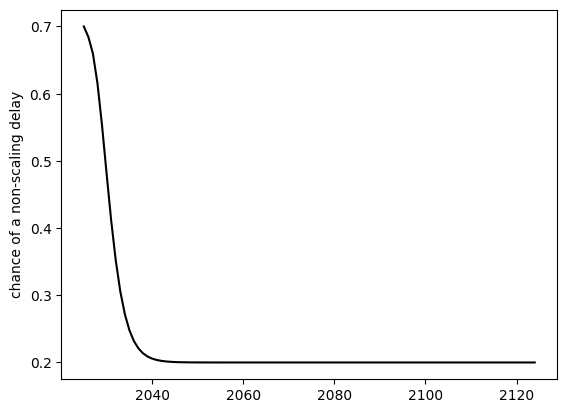

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 55%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 48%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 41%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 35%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 31%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2035

In [8]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-04-26 10:13:32.486483
